<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [15]:
import pandas as pd
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


print("the mean is:")
print(np.mean(sales))
def ismean(list):
  total = 0
  for element in list:
    total+= element
  return total/len(list)

ismean(sales)


the mean is:
3052.714285714286


3052.714285714286

In [28]:

print("the computed variance is:")
print(np.var(sales, ddof=1))


def isvar(list):
  ##find mean
  total = 0
  for element in list:
    total+= element
  mean = total/len(list)
  ##distance to mean
  sum_of_distances = 0
  for element in list:
    dist_to_mean2 = ((element - mean)**2)
    #print(dist_to_mean2)
    sum_of_distances += dist_to_mean2
    #print(sum_of_distances)
  return sum_of_distances/(len(list)-1)


print("the by-hand variance is:")
isvar(sales)


the computed variance is:
214387.90476190473
the by-hand variance is:


214387.90476190473

In [31]:

print("the computed standard deviation is:")
print(np.std(sales, ddof=1))


def isstd(list):
  ##find mean
  total = 0
  for element in list:
    total+= element
  mean = total/len(list)
  ##distance to mean
  sum_of_distances = 0
  for element in list:
    dist_to_mean2 = ((element - mean)**2)
    #print(dist_to_mean2)
    sum_of_distances += dist_to_mean2
    #print(sum_of_distances)
  variance = sum_of_distances/(len(list)-1)
  return variance**(1/2)

print("the by-hand standard deviation is:")
isstd(sales)

the computed standard deviation is:
463.0204150595357
the by-hand standard deviation is:


463.0204150595357

In [50]:
###double checking to make sure my functions work on another list

import random

random_assortment_from_one_to_onehundred = []

for item in range(100):
  random_assortment_from_one_to_onehundred.append(random.randint(0,100))

print(ismean(random_assortment_from_one_to_onehundred))
print(isvar(random_assortment_from_one_to_onehundred))
print(isstd(random_assortment_from_one_to_onehundred))



49.25
669.5631313131313
25.875917980105193


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [55]:
numberofcustomers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'sales': sales,
                   'numberofcustomers': numberofcustomers})

df.head()

df.cov()


,sales,numberofcustomers
sales,214387.904762,7604.357143
numberofcustomers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [56]:
isstd(numberofcustomers)
###standard deviation of customers who entered last week

17.057326313123664

In [57]:
isstd(sales)
###standard deviation of sales

463.0204150595357

In [58]:
df.corr()

,sales,numberofcustomers
sales,1.000000,0.962834
numberofcustomers,0.962834,1.000000


In [64]:
###this got the right answer for the more importnant metric (sales vs number of customers) but failed on the correlation of 1 for sales vs sales. Not sure why.

sales_num_corr = (df.cov())/(isstd(numberofcustomers)*isstd(sales))

sales_num_corr

,sales,numberofcustomers
sales,27.144959,0.962834
numberofcustomers,0.962834,0.036839


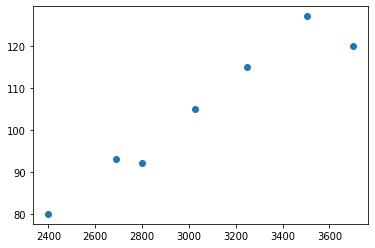

In [69]:
import matplotlib.pyplot as plt

plt.scatter(sales, numberofcustomers);

###just checking visually to make sure that the corellation coefficiants above make sense. They do!

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [78]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [79]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [80]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

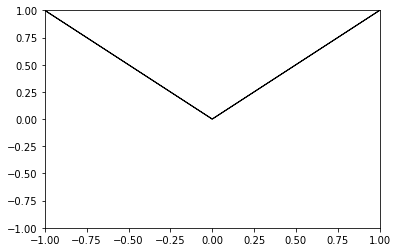

In [89]:
vector_a = [1,1]
vector_b = [-1,1]

plt.arrow(0,0, vector_a[0], vector_a[1])
plt.arrow(0,0, vector_b[0], vector_b[1])
plt.xlim(-1, 1)
plt.ylim(-1,1)


plt.show()

##orthogonal means that the vectors are perpendicular to each other (although it doesn't look like it on this graph).


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [97]:
orth_or_no = pd.DataFrame([[-5, 3, 7], [6, -8, 2]])

orth_or_no.dot

##doesn't look like they're orthogonal, because the dot product ≠ 0

<bound method DataFrame.dot of    0  1  2
0 -5  3  7
1  6 -8  2>

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [100]:
c=[2,-15,6,20]

(np.linalg.norm(c))**2

665.0

In [106]:
np.dot(c,c)

665

In [119]:
df_c = pd.DataFrame(c)

df_c

np.dot(df_c.T, c)

###They are all the same!!

array([665])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

 \begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89
\end{align}



 \begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{13.89}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix} \frac{1}{5} \\ \frac{86}{100} \end{bmatrix}
\end{align}



 \begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 + 64} = \sqrt{189} = 13.75
\end{align}


 \begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{13.75}\begin{bmatrix} 2 \\ 11 \\  -8 \end{bmatrix} = \begin{bmatrix} .15 \\ .8 \\  -.58 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [149]:
f = [4,12,11,9,2]


norm = np.linalg.norm(f)
unit_vector = []
for item in f:
  unit_vector.append((1/norm)*item)

unit_vector




[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-3, 2)

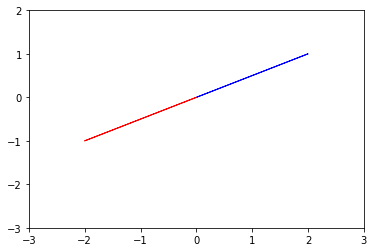

In [157]:
plt.arrow(0, 0, 2, 1, color ='blue');
plt.arrow(0, 0, -2, -1, color ='red');

plt.xlim(-3,3)          
plt.ylim(-3,2)

###linearly dependent


(-3, 2)

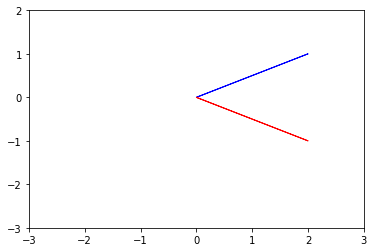

In [158]:


plt.arrow(0, 0, 2, 1, color ='blue');
plt.arrow(0, 0, 2, -1, color ='red');

plt.xlim(-3,3)          
plt.ylim(-3,2)

###linearly independent



# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

(-3, 10)

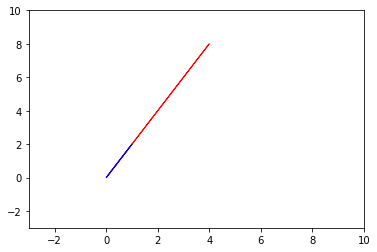

In [163]:
plt.arrow(0, 0, 4, 8, color ='red');
plt.arrow(0, 0, 1, 2, color ='blue');


plt.xlim(-3,10)          
plt.ylim(-3,10)

###The span is undefined because it's a line (the vectors are dependent)

## 5.2 What is the span of $\{l, m, n\}$?

##hint: should be the same as 7.1

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
##based on 7.1, the span covers all of three dimensional space because
## the vectors are all independent 


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



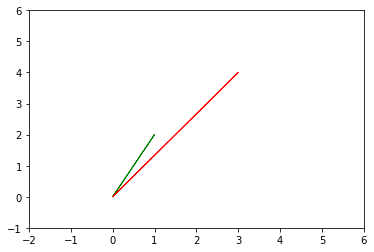

In [170]:

plt.arrow(0,0, 1, 2, color ='green')
plt.arrow(0,0, 3, 4, color ='red')


plt.xlim(-2, 6)          
plt.ylim(-1,6)

plt.show()

## 6.2 What does it mean to form a basis?

the basis is formed when two independent vectors span a vector space


# Rank

## 7.1 What is the Rank of P?

##hint: should be the same as 5.2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [167]:
P = np.array([[1,2,3],
              [-1, 0, 7],
              [4,8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

In [0]:
## the rank tells you how many independent vectors exist.

## This is important because, for many linear algebra analyses, all variables must be independent otherwise functions break.

# stretch goal

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

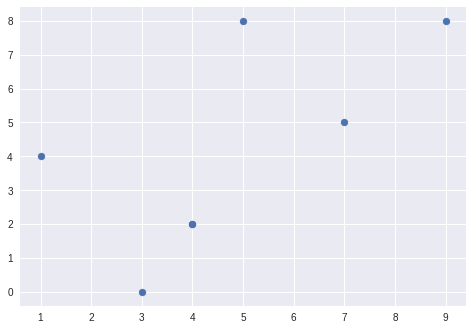

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()